In [24]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx

import sklearn.model_selection as sklm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as skl
from sklearn.linear_model import Ridge


from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd 



# Project 1 A

Write own code for Ordinary Least Squares. Find the conﬁdence intervals of the parameters β by computing their variances, evaluate the Mean Squared error (MSE) and R2-score


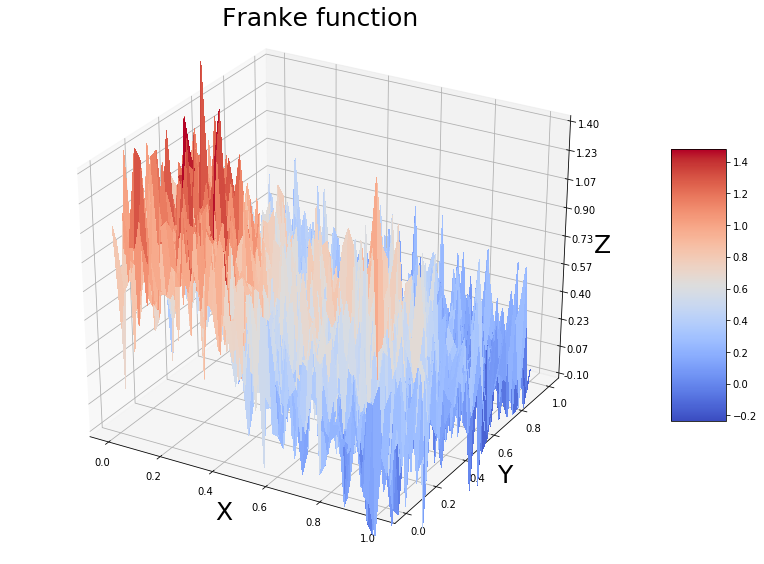

In [25]:
fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d')
n_x         = 50

# Make data. 
x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)


x_mesh, y_mesh  = np.meshgrid(x,y)
noise_level     = 0.25
frank           = fx.FrankeFunction(x_mesh, y_mesh, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X', fontsize=25)
ax.set_ylabel('Y', fontsize=25)
ax.set_zlabel('Z', fontsize=25)
plt.title('Franke function', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# for our computations, we reshape the Franke function to a 1D array
frank           = np.ravel(frank)


# OLS regression for polynomial degree 1-5

In [26]:
maxpower = 5

# preallocating variables
beta_ols       = {}
pred_ols       = {}
confidence_ols = {}
mse_ols        = np.empty([maxpower])
r2_ols         = np.empty([maxpower])
mse_ols_scikit = np.empty([maxpower])
r2_ols_scikit  = np.empty([maxpower])

# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ols ['poly{0}'.format(i+1)], pred_ols ['poly{0}'.format(i+1)]\
                = fx.OridinaryLeastSquares(design,frank,design) 
    #storing MSE and R2
    mse_ols[i]        = fx.MSE(np.ravel(frank),pred_ols['poly'+str(i+1)])
    r2_ols[i]         = fx.R2Score(np.ravel(frank),pred_ols['poly'+str(i+1)])
    mse_ols_scikit[i] = mean_squared_error(np.ravel(frank),pred_ols['poly'+str(i+1)])
    r2_ols_scikit[i]  = r2_score(np.ravel(frank),pred_ols['poly'+str(i+1)])
    # Extracting the confidence interval
    confidence_ols ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95)
    print((i+1)*100/maxpower, '% completed')
    

20.0 % completed
40.0 % completed
60.0 % completed
80.0 % completed
100.0 % completed


# Plotting MSE and R2-score 

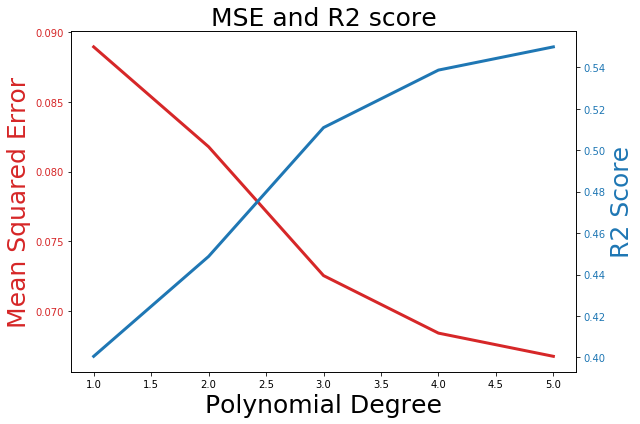

In [27]:



fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_ols, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ols, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score',fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

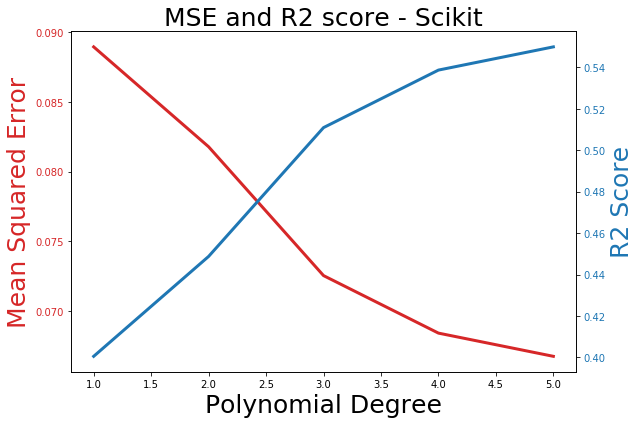

In [28]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_ols_scikit, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ols_scikit, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score - Scikit',fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



# Plotting beta values with confidence interval for fith-order polynomial

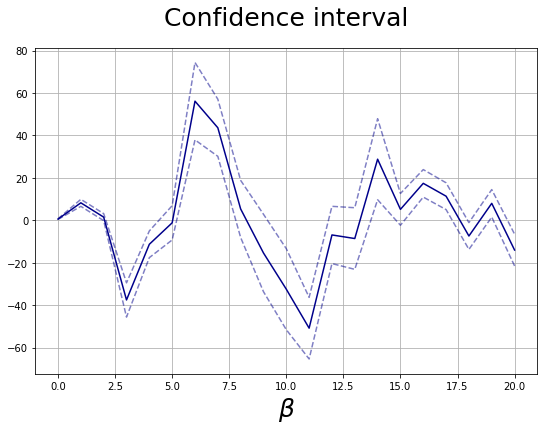

In [29]:

power = 5

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(beta_ols['poly'+str(power)] - confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
ax.plot(beta_ols['poly'+str(power)] + confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
ax.plot(beta_ols['poly'+str(power)], c='darkblue')
plt.title('Confidence interval', fontsize=25, y=1.05)
ax.set_xlabel(r'$\beta$',fontsize=25)  # we already handled the x-label with ax1
ax.grid()
plt.show()


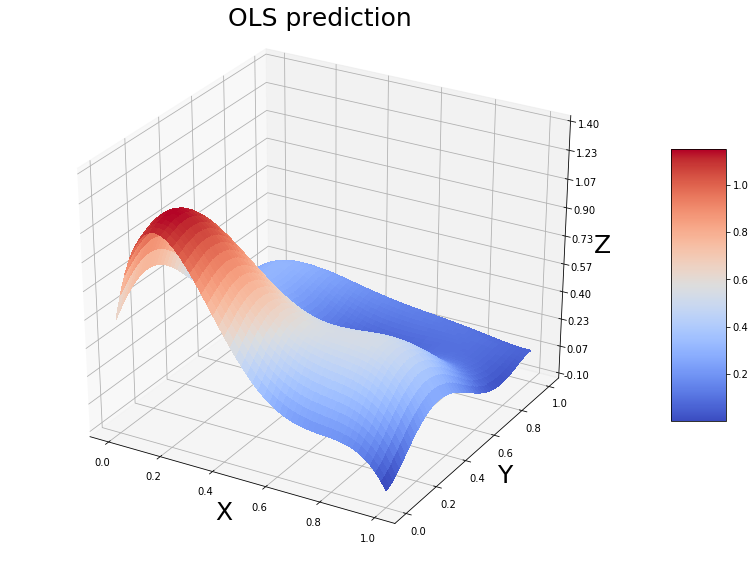

In [30]:
fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d')
ols_prediction=pred_ols['poly5'].reshape((n_x,n_x))

# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, ols_prediction, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X', fontsize=25)
ax.set_ylabel('Y', fontsize=25)
ax.set_zlabel('Z', fontsize=25)
plt.title('OLS prediction', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


# Project 1 B
Split data in training and test data. Implement k-fold cross validation


In [31]:

# evaluting for fifth order polynomial.
design      = fx.DesignDesign(x,y,5)
design_train, design_test, y_train, y_test = train_test_split(design, frank, test_size=0.2)#splitting data 

# testing our OLS against scikit
beta , prediction = fx.OridinaryLeastSquares(design_train,y_train,design_test)
prediction_scikit = LinearRegression().fit(design_train, y_train).predict(design_test)


print("Test R2")
print(fx.R2Score(y_test,prediction))
print("Test R2- Scikit Learn")
print(r2_score(y_test,prediction_scikit)) 


print("Test MSE")
print(fx.MSE(y_test,prediction))          
print("Test MSE- Scikit Learn")
print(mean_squared_error(y_test,prediction_scikit))

Test R2
0.5426448697090808
Test R2- Scikit Learn
0.5426448697080681
Test MSE
0.06932188339061852
Test MSE- Scikit Learn
0.06932188339077201


# K-fold Cross-Validation

In [32]:
maxpower = 5
r2_out   = np.zeros(maxpower)
r2_in    = np.zeros(maxpower)
mse_out  = np.zeros(maxpower)
mse_in   = np.zeros(maxpower)
#bias     = np.zeros(maxpower)
#variance = np.zeros(maxpower)

r2_out_sci   = np.zeros(maxpower)
r2_in_sci    = np.zeros(maxpower)
mse_out_sci  = np.zeros(maxpower)
mse_in_sci   = np.zeros(maxpower)
#bias_sci     = np.zeros(maxpower)
#variance_sci = np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2_out[i], mse_out[i], r2_in[i], mse_in[i] \
                    = fx.k_fold_cv(7, frank, design_matrix, fx.OridinaryLeastSquares, shuffle=True)
    r2_out_sci[i], mse_out_sci[i], r2_in_sci[i], mse_in_sci[i] \
                    = fx.k_fold_cv(7, frank, design_matrix, fx.OridinaryLeastSquares, shuffle=True, scikit=True)
    
    print((i+1)*100/maxpower, '% completed')


20.0 % completed
40.0 % completed
60.0 % completed
80.0 % completed
100.0 % completed


# Project 1 C

### Plotting in-sample (training) error and out-sample (test) error as a function of model complexity

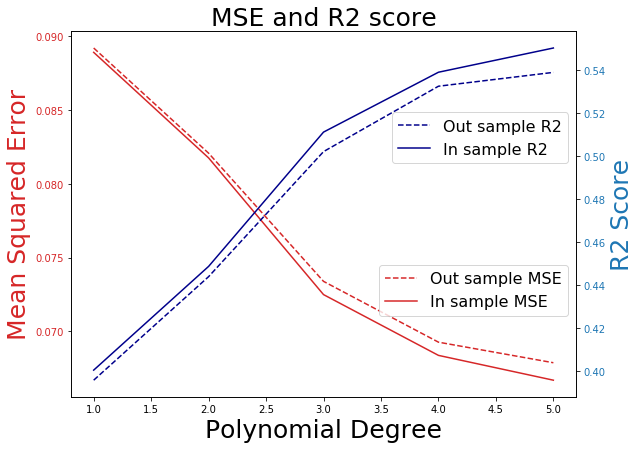

In [33]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_out, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.2),fontsize=16)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in,  c='darkblue', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.8),fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('MSE and R2 score',fontsize=25)
plt.show()



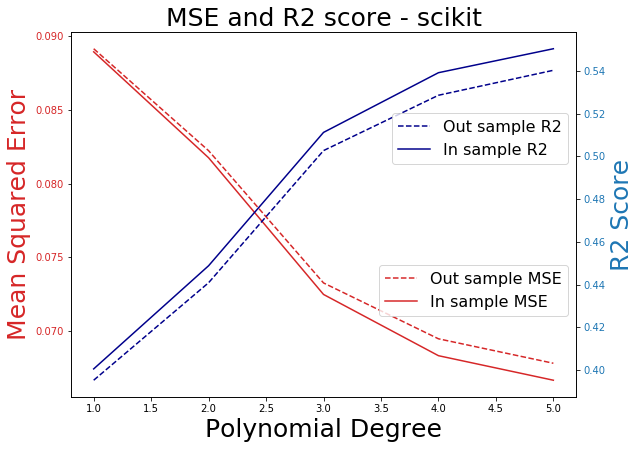

In [34]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_out_sci, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in_sci, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.2),fontsize=16)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out_sci, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in_sci,  c='darkblue', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.8),fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('MSE and R2 score - scikit',fontsize=25)
plt.show()


# Bias-Variance trade-off

In [35]:
#Bootstrap part and initializations 

import functions as fx
err = []
bi=[]
vari=[]

N = 1000
degrees = np.arange(0,15)



for degree in degrees:
    print(degree)
    model   = fx.DesignDesign(x,y,degree)
    error,bias,variance = fx.N_bootstraps(frank,model,fx.OridinaryLeastSquares,N)
    err.append(error)
    bi.append(bias)
    vari.append(variance)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


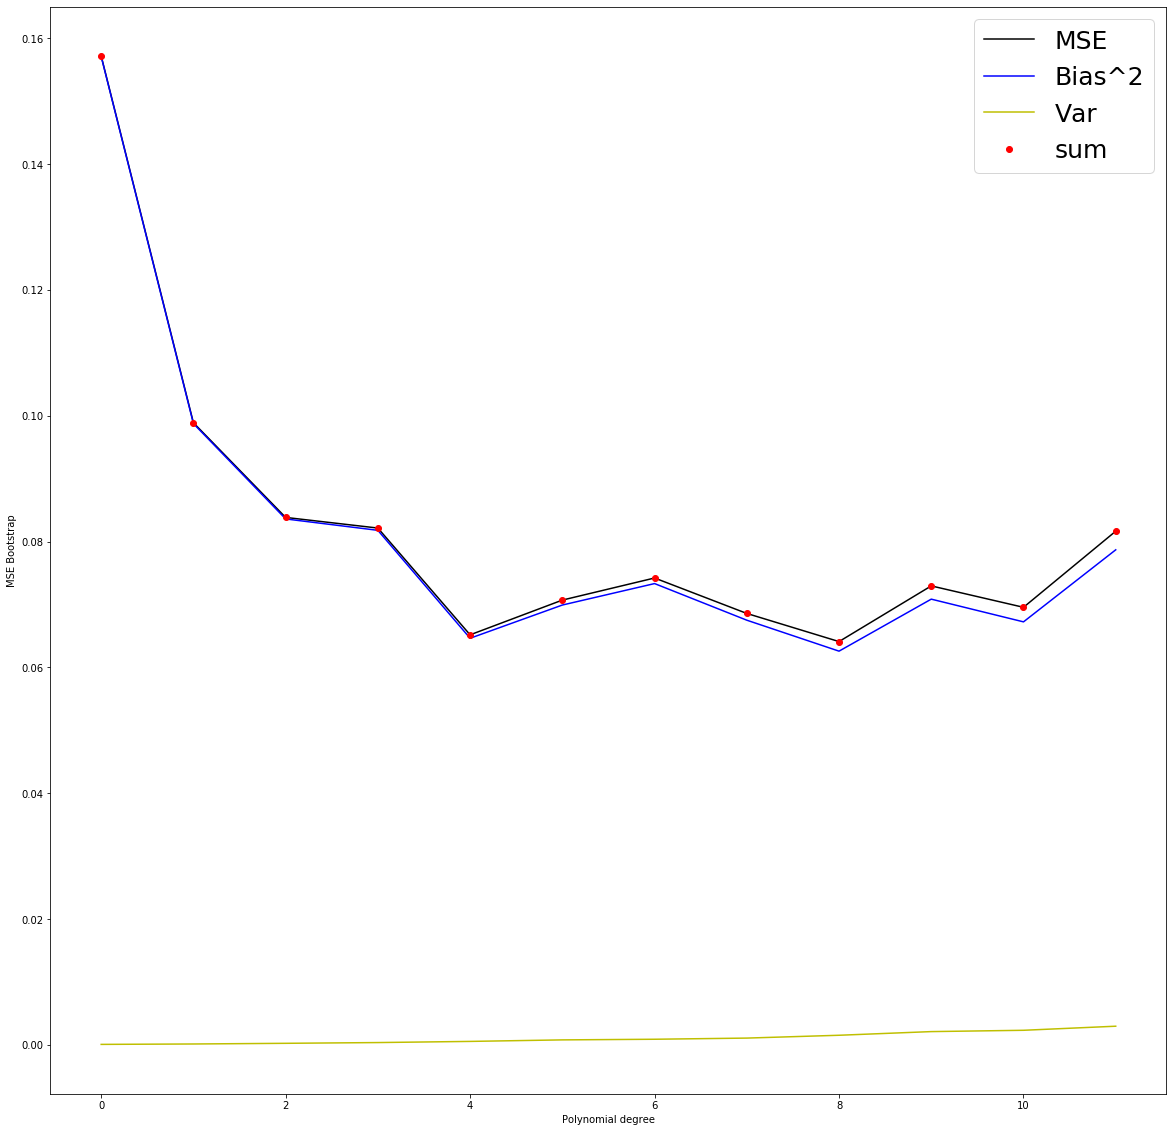

In [36]:

max_pd=12
plt.figure(figsize=(20,20))
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],np.asarray(bi[:max_pd]),'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend(fontsize=25)
plt.show()

# Oppgave D - Ridge Regression

In [37]:
maxpower=5

# preallocating variables
beta_ridge       = {}
pred_ridge       = {}
confidence_ridge = {}
mse_ridge        = np.empty([maxpower])
r2_ridge         = np.empty([maxpower])
mse_ridge_scikit = np.empty([maxpower])
r2_ridge_scikit  = np.empty([maxpower])



# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ridge ['poly{0}'.format(i+1)], pred_ridge ['poly{0}'.format(i+1)]\
                = fx.RidgeRegression(design,frank,design, _lambda= 10e-04) 

    mse_ridge[i]        = fx.MSE(frank,pred_ridge['poly'+str(i+1)])
    r2_ridge[i]         = fx.R2Score(frank,pred_ridge['poly'+str(i+1)])
    mse_ridge_scikit[i] = mean_squared_error(frank,pred_ridge['poly'+str(i+1)])
    r2_ridge_scikit[i]  = r2_score(frank,pred_ridge['poly'+str(i+1)])
    
    confidence_ridge ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95,_lambda= 10e-04)
    print((i+1)*100/maxpower, '% completed')

20.0 % completed
40.0 % completed
60.0 % completed
80.0 % completed
100.0 % completed


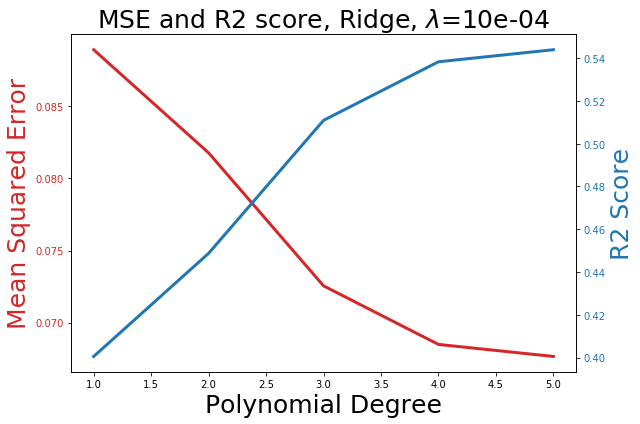

In [38]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_ridge, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ridge, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score, Ridge, $\lambda$=10e-04',fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



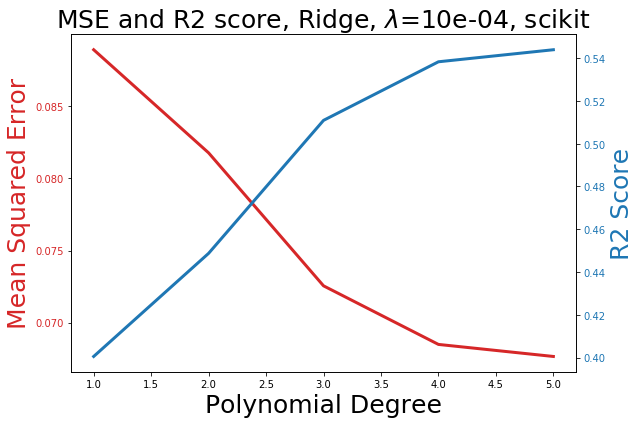

In [39]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(range(1,maxpower+1), mse_ridge_scikit, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ridge_scikit, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score, Ridge, $\lambda$=10e-04, scikit',fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





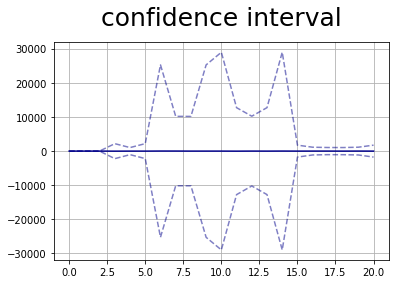

In [40]:

power =5

plt.plot(beta_ridge['poly'+str(power)] - confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ridge['poly'+str(power)] + confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ridge['poly'+str(power)], c='darkblue')
plt.title('confidence interval', fontsize=25, y=1.05)
plt.grid()
plt.show()


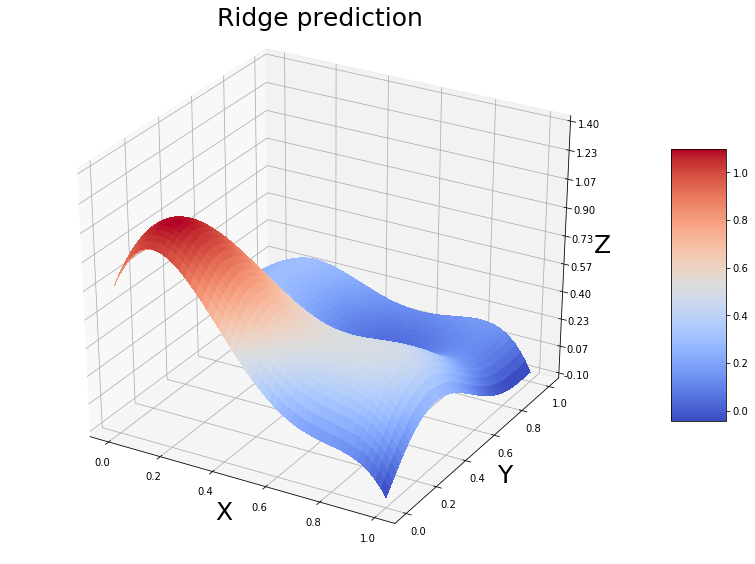

In [41]:
ridge_prediction = pred_ridge['poly5'].reshape((n_x,n_x))

fig         = plt.figure(figsize=(14,10)) 
ax          = fig.gca(projection='3d')


# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, ridge_prediction, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X', fontsize=25)
ax.set_ylabel('Y', fontsize=25)
ax.set_zlabel('Z', fontsize=25)
plt.title('Ridge prediction', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



In [42]:
power=5
lambdas=np.logspace(-4,2,7)





beta_ridge       = {}
pred_ridge       = {}
confidence_ridge = {}
mse_ridge        = np.empty([lambdas.shape[0]])
r2_ridge         = np.empty([lambdas.shape[0]])
mse_ridge_scikit = np.empty([lambdas.shape[0]])
r2_ridge_scikit  = np.empty([lambdas.shape[0]])


# Running loop over model complexity (polynomial degree) 
for i in range(lambdas.shape[0]):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,power)  
    beta_ridge ['lamb{0}'.format(i+1)], pred_ridge ['lamb{0}'.format(i+1)]\
                = fx.RidgeRegression(design,np.ravel(frank),design, _lambda= lambdas[i]) 
    
    mse_ridge[i]        = fx.MSE(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    r2_ridge[i]         = fx.R2Score(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    mse_ridge_scikit[i] = mean_squared_error(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    r2_ridge_scikit[i]  = r2_score(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    
    confidence_ridge ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95,_lambda= 10e-04)
    print((i+1)*100/lambdas.shape[0], '% completed')
    

14.285714285714286 % completed
28.571428571428573 % completed
42.857142857142854 % completed
57.142857142857146 % completed
71.42857142857143 % completed
85.71428571428571 % completed
100.0 % completed


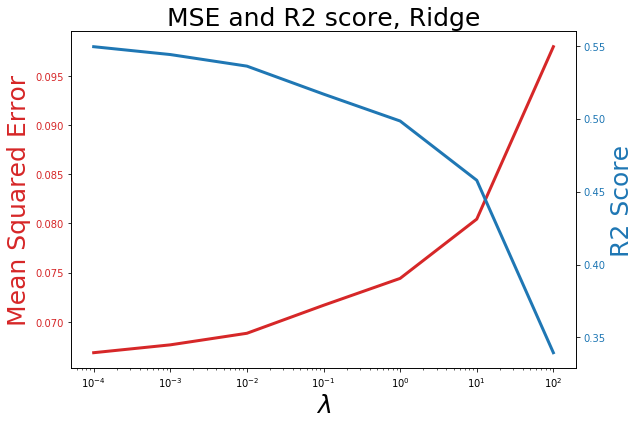

In [50]:
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('$\lambda$',fontsize=25)
ax1.set_ylabel('Mean Squared Error',fontsize=25, color=color)
ax1.plot(lambdas, mse_ridge, color=color,linewidth=3)
plt.xscale('log')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score',fontsize=25, color=color)  # we already handled the x-label with ax1
ax2.plot(lambdas, r2_ridge, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R2 score, Ridge',fontsize=25)
plt.xscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





In [51]:
design      = fx.DesignDesign(x,y,5)  
design_train, design_test, y_train, y_test = train_test_split(design, np.ravel(frank), test_size=0.2)

# matrix inversion to find beta
beta, prediction = fx.RidgeRegression(design_train, y_train, design_test, _lambda=10e-04)

prediction_scikit= Ridge(alpha=10e-04).fit(design_train, y_train).predict(design_test)


print("Test R2")
print(fx.R2Score(y_test,prediction))
print("Test R2- Scikit Learn")
print(r2_score(y_test,prediction_scikit)) 

# Tester med Scikit Learn



print("Test MSE")
print(fx.MSE(y_test,prediction))          
print("Test MSE- Scikit Learn")
print(mean_squared_error(y_test,prediction_scikit))

Test R2
0.5191274940399455
Test R2- Scikit Learn
0.5191268363856075
Test MSE
0.07082223856963198
Test MSE- Scikit Learn
0.07082233542805462


In [53]:
maxpower = 5
lambdas=np.logspace(-4,2,7)

r2_out_ridge   = np.zeros([maxpower,lambdas.shape[0]])
r2_in_ridge    = np.zeros([maxpower,lambdas.shape[0]])
mse_out_ridge  = np.zeros([maxpower,lambdas.shape[0]])
mse_in_ridge   = np.zeros([maxpower,lambdas.shape[0]])
bias_ridge     = np.zeros([maxpower,lambdas.shape[0]])
variance_ridge = np.zeros([maxpower,lambdas.shape[0]])

r2_out_sci_ridge   = np.zeros([maxpower,lambdas.shape[0]])
r2_in_sci_ridge    = np.zeros([maxpower,lambdas.shape[0]])
mse_out_sci_ridge  = np.zeros([maxpower,lambdas.shape[0]])
mse_in_sci_ridge   = np.zeros([maxpower,lambdas.shape[0]])
bias_sci_ridge     = np.zeros([maxpower,lambdas.shape[0]])
variance_sci_ridge = np.zeros([maxpower,lambdas.shape[0]])
tmp=0
for i in range(maxpower):
    for j in range(lambdas.shape[0]):
        
        design_matrix   = fx.DesignDesign(x,y,i+1)
        r2_out_ridge[i,j], mse_out_ridge[i,j], r2_in_ridge[i,j], mse_in_ridge[i,j] \
                        = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.RidgeRegression, _lambda=lambdas[j], shuffle=True)
        r2_out_sci_ridge[i,j], mse_out_sci_ridge[i,j], r2_in_sci_ridge[i,j], mse_in_sci_ridge[i,j], \
                        = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.RidgeRegression, _lambda=lambdas[j], shuffle=True, scikit=True)
        tmp=tmp+1
        print((tmp)*100/(maxpower*lambdas.shape[0]), '% completed')


2.857142857142857 % completed
5.714285714285714 % completed
8.571428571428571 % completed
11.428571428571429 % completed
14.285714285714286 % completed
17.142857142857142 % completed
20.0 % completed
22.857142857142858 % completed
25.714285714285715 % completed
28.571428571428573 % completed
31.428571428571427 % completed
34.285714285714285 % completed
37.142857142857146 % completed
40.0 % completed
42.857142857142854 % completed
45.714285714285715 % completed
48.57142857142857 % completed
51.42857142857143 % completed
54.285714285714285 % completed
57.142857142857146 % completed
60.0 % completed
62.857142857142854 % completed
65.71428571428571 % completed
68.57142857142857 % completed
71.42857142857143 % completed
74.28571428571429 % completed
77.14285714285714 % completed
80.0 % completed
82.85714285714286 % completed
85.71428571428571 % completed
88.57142857142857 % completed
91.42857142857143 % completed
94.28571428571429 % completed
97.14285714285714 % completed
100.0 % completed


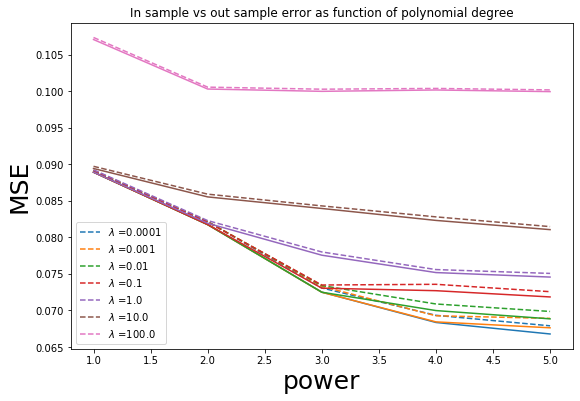

In [62]:
fig, ax = plt.subplots(figsize=(9,6))

for i in range(np.shape(lambdas)[0]):
    pl=ax.plot(range(1,maxpower+1),mse_out_ridge[:,i], label='$\lambda$ ='+str(lambdas[i]),linestyle='--')
    col=pl[0].get_color()
    ax.plot(range(1,maxpower+1),mse_in_ridge[:,i], color=col)
    
plt.legend()
plt.xlabel('power', fontsize=25)
plt.ylabel('MSE', fontsize=25)
plt.title('In sample vs out sample error as function of polynomial degree')
plt.show()

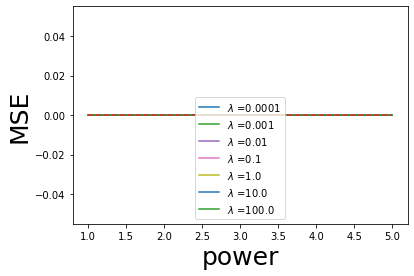

In [61]:

for i in range(np.shape(lambdas)[0]):
    plt.plot(range(1,maxpower+1),bias_ridge[:,i], label='$\lambda$ ='+str(lambdas[i]))
    plt.plot(range(1,maxpower+1),variance_ridge[:,i], linestyle='--')
    
plt.legend()
plt.xlabel('power', fontsize=25)
plt.ylabel('MSE', fontsize=25)
plt.show()

In [63]:
#Bootstrap part and initializations 

import functions as fx
err = []
bi=[]
vari=[]

N = 1000
degrees = np.arange(0,12)
lambdas=np.logspace(-4,2,7)

err=np.empty((len(degrees),len(lambdas)))
bi=np.empty((len(degrees),len(lambdas)))
vari=np.empty((len(degrees),len(lambdas)))

for degree in degrees:
    print(degree)
    model   = fx.DesignDesign(x,y,degree)
    for lamb in len(lambdas):
        error,bias,variance = fx.N_bootstraps(frank,model,fx.RidgeRegression,N, _lambda=lambdas[lamb]
        err[degree,lamb]=error
        bi[degree,lamb]=bias
        vari[degree,lamb]=error


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


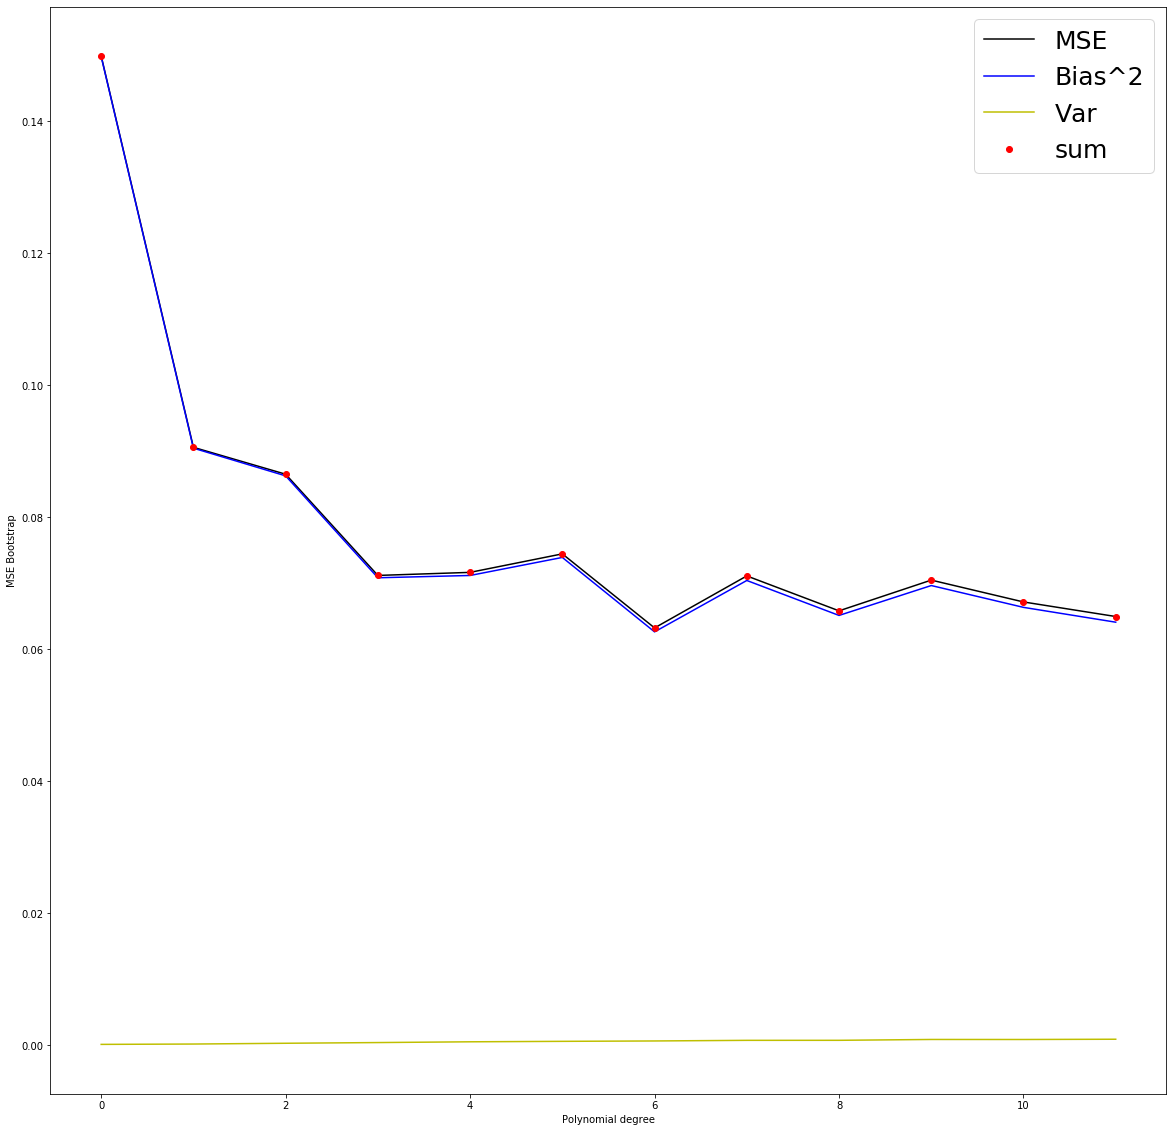

In [64]:
max_pd=12
plt.figure(figsize=(20,20))
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],np.asarray(bi[:max_pd]),'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend(fontsize=25)
plt.show()

# Oppgave E - LASSO

In [ ]:


# 1) Lasso regression with Sklearn

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.linear_model as skl

shape=[n_x,n_x]
x_lasso = np.ravel(x_mesh)
y_lasso = np.ravel(y_mesh)
z_lasso = np.ravel(frank)

lasso_multi = np.c_[x_lasso, y_lasso]

# Bruker sklearn for å finne Lasso-modell. Bruker PolynomialFeatures for ikke lineær funksjon
poly2 = PolynomialFeatures(degree=15)

# Transformerer variabelmatrisen 
Lasso_sklearn = poly2.fit_transform(lasso_multi)

# Beregner Lasso modell 
lasso = linear_model.Lasso(alpha=0.001, fit_intercept=False)
fit_lasso = lasso.fit(Lasso_sklearn, z_lasso) 

# beregner forventet z-verdier av x og y verdier
predictLasso = lasso.predict(Lasso_sklearn)


# Plotter forventet overflate med Lasso modellen 
predict_mesh_Lasso = predictLasso.reshape(shape) # for å få den i samme dimensjon som x og y. 

fig = plt.figure()
ax = fig.gca(projection='3d')   
   
surf = ax.plot_surface(x_mesh, y_mesh, predict_mesh_Lasso, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z - Franke')
    
# Add a color bar which maps values to colors.
clb = fig.colorbar(surf, shrink=0.5, aspect=5)
clb.ax.set_title('Level')

plt.show()


print("MSE")
print(fx.MSE(frank,np.ravel(predict_mesh_Lasso)))
print("R2")
print(fx.R2Score(frank,np.ravel(predict_mesh_Lasso)))
        

print("MSE- Scikit Learn")
print(mean_squared_error(frank,np.ravel(predict_mesh_Lasso)))
print("R2- Scikit Learn")
print(r2_score(frank,np.ravel(predict_mesh_Lasso)))



In [ ]:
print(lasso.coef_)

In [ ]:
maxpower = 5
r2_out   = np.zeros(maxpower)
r2_in    = np.zeros(maxpower)
mse_out  = np.zeros(maxpower)
mse_in   = np.zeros(maxpower)
bias     = np.zeros(maxpower)
variance = np.zeros(maxpower)

r2_out_sci   = np.zeros(maxpower)
r2_in_sci    = np.zeros(maxpower)
mse_out_sci  = np.zeros(maxpower)
mse_in_sci   = np.zeros(maxpower)
bias_sci     = np.zeros(maxpower)
variance_sci = np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2_out[i], mse_out[i], r2_in[i], mse_in[i], bias[i], variance[i] \
                    = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.OridinaryLeastSquares, shuffle=True)
    r2_out_sci[i], mse_out_sci[i], r2_in_sci[i], mse_in_sci[i], bias_sci[i], variance_sci[i] \
                    = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.OridinaryLeastSquares, shuffle=True, scikit=True)
    
    print((i+1)*100/maxpower, '% completed')


In [ ]:

#scipy.misc.imread

# Laster opp terrengdata

terrain_data = imread('SRTM_data_Norway_1.tif')
[n,m] = terrain_data.shape



In [ ]:
np.std(terrain_n)

In [ ]:
# Plotter terrengdata


fig, ax = plt.subplots(figsize=(40,10))
plt.title('Terrain over Norway 1', fontsize=50)
plt.imshow(terrain_data.T, cmap='hot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# subselecting the data. 


#/np.max(terrain_data[:,:])
terrain_n = terrain_data[250:500,1000:1250]
terrain_norm = (terrain_n-np.mean(terrain_n))/np.std(terrain_n)
terrain=terrain_norm


fig, ax = plt.subplots(figsize=(40,10))
plt.title('Subselected data', fontsize=50)
plt.imshow(terrain_norm.T, cmap='hot')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()



In [ ]:
x=np.arange(terrain.shape[0])/terrain.shape[0]
y=np.arange(terrain.shape[1])/terrain.shape[1]

x_mesh, y_mesh  = np.meshgrid(x,y)


design_matrix = fx.DesignDesign(x,y,8)


beta,pred=fx.OridinaryLeastSquares(design_matrix,np.ravel(terrain), design_matrix)

prediction_ols=pred.reshape(terrain.shape[0],terrain.shape[1])

fig, ax = plt.subplots(figsize=(40,10))
plt.title('Subselected data')
plt.imshow(prediction_ols.T, cmap='hot')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

print('Mean Squared Error', fx.MSE(terrain,prediction_ols))
print('r2score', fx.R2Score(terrain,prediction_ols))


fig         = plt.figure() 
ax          = fig.gca(projection='3d')


# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, prediction_ols, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Terrain data', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
plt.plot(x)
plt.plot(np.linspace(0,1,len(x)))
plt.show()

In [ ]:
maxpower = 10

# preallocating variables
beta_ols       = {}
pred_ols       = {}
confidence_ols = {}
mse_ols        = np.empty([maxpower])
r2_ols         = np.empty([maxpower])
mse_ols_scikit = np.empty([maxpower])
r2_ols_scikit  = np.empty([maxpower])

# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ols ['poly{0}'.format(i+1)], pred_ols ['poly{0}'.format(i+1)]\
                = fx.OridinaryLeastSquares(design,np.ravel(terrain),design) 
    
    mse_ols[i]        = fx.MSE(np.ravel(terrain),pred_ols['poly'+str(i+1)])
    r2_ols[i]         = fx.R2Score(np.ravel(terrain),pred_ols['poly'+str(i+1)])
    mse_ols_scikit[i] = mean_squared_error(np.ravel(terrain),pred_ols['poly'+str(i+1)])
    r2_ols_scikit[i]  = r2_score(np.ravel(terrain),pred_ols['poly'+str(i+1)])
    
    confidence_ols ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95)
    print((i+1)*100/maxpower, '% completed')
    

In [ ]:
ols_prediction = pred_ols['poly5'].reshape((250,250))


fig         = plt.figure() 
ax          = fig.gca(projection='3d')


# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, ols_prediction, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Terrain data', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(1,maxpower+1), mse_ols, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_ols, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:

power =10

plt.plot(beta_ols['poly'+str(power)] - confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ols['poly'+str(power)] + confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ols['poly'+str(power)], c='darkblue')
plt.title('confidence interval', fontsize=25, y=1.05)
plt.grid()
plt.show()


In [ ]:
maxpower = 10
r2_out   = np.zeros(maxpower)
r2_in    = np.zeros(maxpower)
mse_out  = np.zeros(maxpower)
mse_in   = np.zeros(maxpower)
bias     = np.zeros(maxpower)
variance = np.zeros(maxpower)

r2_out_sci   = np.zeros(maxpower)
r2_in_sci    = np.zeros(maxpower)
mse_out_sci  = np.zeros(maxpower)
mse_in_sci   = np.zeros(maxpower)
bias_sci     = np.zeros(maxpower)
variance_sci = np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2_out[i], mse_out[i], r2_in[i], mse_in[i], bias[i], variance[i] \
                    = fx.k_fold_cv(20, np.ravel(terrain), design_matrix, fx.OridinaryLeastSquares, shuffle=True)
    
     
    print((i+1)*100/maxpower, '% completed')

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(1,maxpower+1), mse_out, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.1))
ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim(0.00, 0.02) 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in,  c='green', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
#ax2.set_ylim(0.64, 1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




In [ ]:
plt.plot(bias, c='darkblue', label='bias')
plt.plot(variance, c='red', label='variance')
plt.plot(mse_out, c='green', label='mse')
plt.legend()
plt.title('Bias Variance Tradeoff', fontsize=25, y=1.05)
plt.grid()
plt.show()


In [ ]:
maxpower=10

# preallocating variables
beta_ridge       = {}
pred_ridge       = {}
confidence_ridge = {}
mse_ridge        = np.empty([maxpower])
r2_ridge         = np.empty([maxpower])
mse_ridge_scikit = np.empty([maxpower])
r2_ridge_scikit  = np.empty([maxpower])



# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ridge ['poly{0}'.format(i+1)], pred_ridge ['poly{0}'.format(i+1)]\
                = fx.RidgeRegression(design,np.ravel(terrain),design, _lambda= 10e-04) 

    mse_ridge[i]        = fx.MSE(np.ravel(terrain),pred_ridge['poly'+str(i+1)])
    r2_ridge[i]         = fx.R2Score(np.ravel(terrain),pred_ridge['poly'+str(i+1)])
    mse_ridge_scikit[i] = mean_squared_error(np.ravel(terrain),pred_ridge['poly'+str(i+1)])
    r2_ridge_scikit[i]  = r2_score(np.ravel(terrain),pred_ridge['poly'+str(i+1)])
    
    confidence_ridge ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95,_lambda= 10e-04)
    print((i+1)*100/maxpower, '% completed')

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ridge, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ridge, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
power =10

plt.plot(beta_ridge['poly'+str(power)] - confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ridge['poly'+str(power)] + confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ridge['poly'+str(power)], c='darkblue')
plt.title('confidence interval', fontsize=25, y=1.05)
plt.grid()
plt.show()


In [ ]:
ridge_prediction = pred_ridge['poly5'].reshape((250,250))

fig         = plt.figure() 
ax          = fig.gca(projection='3d')


# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, ridge_prediction, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Franke function', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
maxpower = 10
lambdas=np.logspace(-4,2,7)

r2_out_ridge   = np.zeros([maxpower,lambdas.shape[0]])
r2_in_ridge    = np.zeros([maxpower,lambdas.shape[0]])
mse_out_ridge  = np.zeros([maxpower,lambdas.shape[0]])
mse_in_ridge   = np.zeros([maxpower,lambdas.shape[0]])
bias_ridge     = np.zeros([maxpower,lambdas.shape[0]])
variance_ridge = np.zeros([maxpower,lambdas.shape[0]])

r2_out_sci_ridge   = np.zeros([maxpower,lambdas.shape[0]])
r2_in_sci_ridge    = np.zeros([maxpower,lambdas.shape[0]])
mse_out_sci_ridge  = np.zeros([maxpower,lambdas.shape[0]])
mse_in_sci_ridge   = np.zeros([maxpower,lambdas.shape[0]])
bias_sci_ridge     = np.zeros([maxpower,lambdas.shape[0]])
variance_sci_ridge = np.zeros([maxpower,lambdas.shape[0]])
tmp=0
for i in range(maxpower):
    for j in range(lambdas.shape[0]):
        
        design_matrix   = fx.DesignDesign(x,y,i+1)
        r2_out_ridge[i,j], mse_out_ridge[i,j], r2_in_ridge[i,j], mse_in_ridge[i,j], bias_ridge[i,j], variance_ridge[i,j] \
                        = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.RidgeRegression, _lambda=lambdas[j], shuffle=True)
        r2_out_sci_ridge[i,j], mse_out_sci_ridge[i,j], r2_in_sci_ridge[i,j], mse_in_sci_ridge[i,j], bias_sci_ridge[i,j], variance_sci_ridge[i,j] \
                        = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.RidgeRegression, _lambda=lambdas[j], shuffle=True, scikit=True)
        tmp=tmp+1
        print((tmp)*100/(maxpower*lambdas.shape[0]), '% completed')




In [ ]:


for i in range(np.shape(lambdas)[0]):
    plt.plot(range(1,maxpower+1),mse_out_ridge[:,i], label='$\lambda$ ='+str(lambdas[i]))
    plt.plot(range(1,maxpower+1),mse_in_ridge[:,i], linestyle='--')
    
plt.legend()
plt.xlabel('power')
plt.ylabel('MSE')
plt.show()


In [ ]:
for i in range(np.shape(lambdas)[0]):
    plt.plot(range(1,maxpower+1),bias_ridge[:,i], label='$\lambda$ ='+str(lambdas[i]))
    plt.plot(range(1,maxpower+1),variance_ridge[:,i], linestyle='--')
    
plt.legend()
plt.xlabel('power')
plt.ylabel('MSE')
plt.show()

In [ ]:
# Cross-validation using Scikit-Learn's KFold function
#initiate stuff again in case data was changed earlier

k=5
degrees = np.arange(1,16)

kfold = KFold(n_splits = k,shuffle=True,random_state=5)


x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)

model   = fx.DesignDesign(x,y,2)
#Two clumsy lines to get the size of y_pred array right
X_train, X_test, Y_train, Y_test = train_test_split(model,frank,test_size=0.2)
X_trainz, X_testz, y_trainz, y_testz = train_test_split(X_train,Y_train,test_size=1./k)
array_size_thingy=len(Y_test)
    
    
err = []
bi=[]
vari=[]

for deg in degrees:
    y_pred = np.empty((array_size_thingy, k))
    ytest = np.empty((array_size_thingy, k))
    j=0
    model   = fx.DesignDesign(x,y,deg)
    X_train, X_test, Y_train, Y_test = train_test_split(model,frank,test_size=0.2)
    Y_test = Y_test.reshape(Y_test.shape[0],1)

    for train_inds,test_inds in kfold.split(X_train):
        xtrain = X_train[train_inds]
        ytrain= Y_train[train_inds]
        #xtest = X_train[test_inds]
        #ytest = frank[test_inds].reshape(ytest.shape[0],1)
        a, y_p=fx.OridinaryLeastSquares(xtrain,ytrain,X_test)
        y_pred[:,j]=y_p.ravel()
        j+=1
        
        
    error = np.mean( np.mean((Y_test - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (Y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd = 9 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE CV')
plt.legend()
plt.show()


In [ ]:
def k_fold_cv(k, indata, indesign, predictor, _lambda=0, shuffle=False, scikit=False):
    
    train_design, test_design, train_data, test_data = train_test_split(model,frank,test_size=0.2)
    
    mask = np.arange(indata.shape[0])
    if shuffle:
        np.random.shuffle(mask)
    data = reshaper(k, indata[mask])
    design = reshaper(k, indesign[mask])
    r2_out = 0
    r2_in = 0
    mse_out = 0
    mse_in = 0
    bias = 0
    variance = 0
    for i in range(k):
        train_design = design[np.arange(len(design))!=i]      # Featch all but the i-th element
        train_design = np.concatenate(train_design,axis=0)
        train_data   = data[np.arange(len(data))!=i]
        train_data   = np.concatenate(train_data,axis=0)
        #test_design  = design[i]
        #test_data    = data[i]



        if _lambda != 0:
            beta, pred = predictor(train_design, train_data, test_design, _lambda)
        else:
            beta, pred = predictor(train_design, train_data, test_design)

        if scikit:
            r2_out += r2_score(test_data, pred)
            r2_in += r2_score(train_data,train_design @ beta)
            mse_out += mean_squared_error(test_data, pred)
            mse_in += mean_squared_error(train_data,train_design @ beta)
        else:
            r2_out += R2Score(test_data, pred)
            r2_in +=R2Score(train_data,train_design @ beta)
            mse_out += MSE(test_data, pred)
            mse_in += MSE(train_data,train_design @ beta)


        bias += np.mean((test_data-np.mean(pred))**2)
        variance += np.mean((pred-np.mean(pred))**2)

    return r2_out/k, mse_out/k, r2_in/k, mse_in/k, bias/k, variance/k


# HER STOPPER KODEN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score#,metrics.explained_variance_score
import sklearn.linear_model as skl
import scipy.linalg as scl
from sklearn.pipeline import Pipeline
from sklearn import model_selection

# The function we fit
def true_fun(X):
    return np.cos(1.5 * np.pi * X)



#Bootstrap part and initializations 
np.random.seed(2018)
err = []
bi=[]
vari=[]

n = 200
n_boostraps = 1000

noise=0.1
x = np.sort(np.random.uniform(0,1,n)).reshape(-1,1)
y = true_fun(x).reshape(-1,1) + np.random.randn(len(x)).reshape(-1,1) * noise
y_no_noise= true_fun(x)

#Polynomial degree
degrees = np.arange(1,16)


#Bootstrap part
for degree in degrees:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        # Evaluate the new model on the same test data each time.
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()
    error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd = 15 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend()
plt.show()


In [ ]:


# Cross-validation using Scikit-Learn's KFold function
#initiate stuff again in case data was changed earlier
#np.random.seed(2018)

noise=0.1
N=1000
k=5
x = np.sort(np.random.uniform(0,1,n)).reshape(-1,1)
y = true_fun(x).reshape(-1,1) + np.random.randn(len(x)).reshape(-1,1) * noise
y_no_noise= true_fun(x)

degrees = np.arange(0,16)
kfold = KFold(n_splits = k,shuffle=True,random_state=5)

#Two clumsy lines to get the size of y_pred array right
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)
X_trainz, X_testz, y_trainz, y_testz = train_test_split(X_train,Y_train,test_size=1./k)
array_size_thingy=len(Y_test)


err = []
bi=[]
vari=[]

for deg in degrees:
    y_pred = np.empty((array_size_thingy, k))
    ytest = np.empty((array_size_thingy, k))
    j=0
    model = make_pipeline(PolynomialFeatures(degree=deg),LinearRegression(fit_intercept=False))
    for train_inds,test_inds in kfold.split(X_train):
        xtrain = X_train[train_inds]
        ytrain= Y_train[train_inds]
        xtest = X_train[test_inds]
        #ytest[:,j] = Y_train[test_inds].ravel()
        y_pred[:,j] = model.fit(xtrain,ytrain).predict(X_test).ravel()
        #error = ( np.mean((ytest[:,j] - y_pred[:,j])**2) )
        #bias = np.mean( (ytest[:,j] - np.mean(y_pred[:,j]))**2 )
        #variance = ( np.var(y_pred[:,j]) )
        #print(error, 'doesnotmatter', bias+variance)
        j+=1
        
        
    error = np.mean( np.mean((Y_test - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (Y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd = 15 #max polynomial degree to plot to
plt.figure()
#plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
#plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
#plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE CV')
plt.legend()
plt.show()


In [ ]:


# Cross-validation using Scikit-Learn's KFold function
#initiate stuff again in case data was changed earlier
np.random.seed(2018)

noise=0.1
N=1000
n=200
k=5
x = np.sort(np.random.uniform(0,1,n)).reshape(-1,1)
y = true_fun(x).reshape(-1,1) + np.random.randn(len(x)).reshape(-1,1) * noise
y_no_noise= true_fun(x)

degrees = np.arange(1,16)

kfold = KFold(n_splits = k,shuffle=True,random_state=5)

#Two clumsy lines to get the size of y_pred array right
X_trainz, X_testz, y_trainz, y_testz = train_test_split(x,y,test_size=1./k)
array_size_thingy=len(y_testz)
x           = np.linspace(0, 1, n)

err = []
bi=[]
vari=[]

for deg in degrees:
    y_pred = np.empty((array_size_thingy, k))
    
    j=0
    #model = make_pipeline(PolynomialFeatures(degree=deg),LinearRegression(fit_intercept=False))
    model   = design_1d(x,deg)
    for train_inds,test_inds in kfold.split(x):
        xtrain = model[train_inds,:]
        ytrain= y[train_inds]
        xtest = model[test_inds,:]
        ytest = y[test_inds]
        #y_pred = model.fit(xtrain,ytrain).predict(xtest).ravel()
        a, y_p=fx.OridinaryLeastSquares(xtrain,ytrain,xtest)
        
        y_pred[:,j]=y_p.ravel()
        j+=1
        
        
    error = np.mean( np.mean((ytest - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (ytest - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd = 12 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE CV')
plt.legend()
plt.show()


In [ ]:
print(ytest.shape)
print(y_pred.shape)

In [ ]:
error = np.mean( np.mean((ytest - y_pred)**2, axis=1, keepdims=True) )

In [ ]:
# Cross-validation using Scikit-Learn's KFold function
#initiate stuff again in case data was changed earlier

k=5
degrees = np.arange(1,16)

kfold = KFold(n_splits = k,shuffle=True,random_state=5)


x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)

model   = fx.DesignDesign(x,y,2)
#Two clumsy lines to get the size of y_pred array right
X_train, X_test, Y_train, Y_test = train_test_split(model,frank,test_size=0.2)
X_trainz, X_testz, y_trainz, y_testz = train_test_split(X_train,Y_train,test_size=1./k)
array_size_thingy=len(Y_test)
    
    
err = []
bi=[]
vari=[]

for deg in degrees:
    y_pred = np.empty((array_size_thingy, k))
    ytest = np.empty((array_size_thingy, k))
    j=0
    model   = fx.DesignDesign(x,y,deg)
    X_train, X_test, Y_train, Y_test = train_test_split(model,frank,test_size=0.2)
    Y_test = Y_test.reshape(Y_test.shape[0],1)

    for train_inds,test_inds in kfold.split(X_train):
        xtrain = X_train[train_inds]
        ytrain= Y_train[train_inds]
        #xtest = X_train[test_inds]
        #ytest = frank[test_inds].reshape(ytest.shape[0],1)
        a, y_p=fx.OridinaryLeastSquares(xtrain,ytrain,X_test)
        y_pred[:,j]=y_p.ravel()
        j+=1
        
        
    error = np.mean( np.mean((Y_test - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (Y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd = 9 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE CV')
plt.legend()
plt.show()


In [ ]:


def design_1d(x,degree):
    design=np.empty([len(x),degree])
    for i in range(degree):
        design[:,i]=x**i
    return design


In [ ]:
def k_fold_cv(k, indata, indesign, predictor, _lambda=0, shuffle=False):
    mask = np.arange(indata.shape[0])
    if shuffle:
        np.random.shuffle(mask)
    data = fx.reshaper(k, indata[mask])
    design = fx.reshaper(k, indesign[mask])
    
    r2_out = 0
    r2_in = 0
    mse_out = 0
    mse_in = 0
    bias = 0
    variance = 0
    prediction = np.empty((np.shape(data[1])[0], k))
    for i in range(k):
        train_design = design[np.arange(len(design))!=i]      # Featch all but the i-th element
        train_design = np.concatenate(train_design,axis=0)
        train_data   = data[np.arange(len(data))!=i]
        train_data   = np.concatenate(train_data,axis=0)
        test_design  = design[i]
        test_data    = data[i]


        
        
        if _lambda != 0:
            beta, pred = predictor(train_design, train_data, test_design, _lambda)
        else:
            beta, pred = (predictor(train_design, train_data, test_design))
            
        prediction[:,i]=pred.ravel() 
    

        r2_out += fx.R2Score(test_data, pred)
        r2_in += fx.R2Score(train_data,train_design @ beta)
        mse_out += fx.MSE(test_data, pred)
        mse_in += fx.MSE(train_data,train_design @ beta)
    
    #bias = fx.MSE(test_data,np.mean(prediction,axis=1, keepdims=True))
    #variance = fx.MSE(pred,np.mean(prediction, axis=1, keepdims=True))
    
    #error = np.mean( np.mean((ytest - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (test_data - np.mean(prediction, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(prediction, axis=1, keepdims=True) )
    

    return r2_out/k, mse_out/k, r2_in/k, mse_in/k, bias, variance



In [ ]:
maxpower=16
r2_out   = np.zeros(maxpower)
r2_in    = np.zeros(maxpower)
mse_out  = np.zeros(maxpower)
mse_in   = np.zeros(maxpower)
bias     = np.zeros(maxpower)
variance = np.zeros(maxpower)

r2_out_sci   = np.zeros(maxpower)
r2_in_sci    = np.zeros(maxpower)
mse_out_sci  = np.zeros(maxpower)
mse_in_sci   = np.zeros(maxpower)
bias_sci     = np.zeros(maxpower)
variance_sci = np.zeros(maxpower)

x           = np.linspace(0, 1, n)


degrees = np.arange(1,16)
for i in degrees:
    
    design_matrix   = design_1d(x,i)
    r2_out[i], mse_out[i], r2_in[i], mse_in[i], bias[i], variance[i]   \
                    = k_fold_cv(5, y, design_matrix, fx.OridinaryLeastSquares, shuffle=True)
    #r2_out_sci[i], mse_out_sci[i], r2_in_sci[i], mse_in_sci[i], bias_sci[i], variance_sci[i] \
    #                = fx.k_fold_cv(7, y, design_matrix, fx.OridinaryLeastSquares, shuffle=True, scikit=True)
    
    print((i+1)*100/maxpower, '% completed')


In [ ]:
plt.plot(mse_out,label='mse')
plt.plot(variance,label='var')
plt.plot(bias,label='bias')
plt.legend()
plt.show()

plt.plot(y)
plt.show()

In [ ]:
np.random.seed(2018)
k=5    
x           = np.linspace(0, 1, n)
degrees = np.arange(1,16)
y = true_fun(x).reshape(-1,1) + np.random.randn(len(x)).reshape(-1,1) * noise
err = []
bi=[]
vari=[]
for deg in degrees:
    j=0
    #model = make_pipeline(PolynomialFeatures(degree=deg),LinearRegression(fit_intercept=False))
    model   = design_1d(x,deg)
    mask = np.arange(y.shape[0])

    np.random.shuffle(mask)
    mask = np.split(mask,k)
    
    #data = fx.reshaper(k, y[mask])
    #design = fx.reshaper(k, model[mask])
    data = y
    design = model
    
    r2_out = 0
    r2_in = 0
    mse_out = 0
    mse_in = 0
    bias = 0
    variance = 0
    prediction = np.empty((int(np.shape(data)[0]/k), k))
    for i in range(k):
        #train_design = design[np.arange(len(design))!=i]      # Featch all but the i-th element
        #train_design = np.concatenate(train_design,axis=0)
        #train_data   = data[np.arange(len(data))!=i]
        #train_data   = np.concatenate(train_data,axis=0)
        #test_design  = design[i]
        #test_data    = data[i]
        
        
        train_design = np.delete(design,mask[i],axis=0)
        train_data   = np.delete(data,mask[i],axis=0)
        test_design  = design[mask[i],:]
        test_data    = data[mask[i]]

      
            
        beta, pred = fx.OridinaryLeastSquares(train_design, train_data, test_design)
            
        prediction[:,i]=pred.ravel() 
    
        
        #r2_out += R2Score(test_data, pred)
        #r2_in +=R2Score(train_data,train_design @ beta)
        #mse_out += fx.MSE(test_data, pred)
        #mse_in += MSE(train_data,train_design @ beta)
        #bias += fx.MSE(test_data, np.mean(pred))
        #variance += fx.MSE(pred, np.mean(pred))
    
    
    error = np.mean( np.mean((np.ravel(data) - np.ravel(prediction))**2))
    bias = np.mean( (test_data - np.mean(prediction, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(prediction, axis=1, keepdims=True) )    
    
    #error = np.mean( np.mean((test_data - pred)**2, axis=1, keepdims=True) )
    #error = mse_out/k
    #bia = bias/k
    #variance = variance/k
    
    
    
    #bias = np.mean( (test_data - np.mean(prediction, axis=1, keepdims=True))**2 )
    #variance = np.mean( np.var(prediction, axis=1, keepdims=True) )
    #variance = np.mean( np.var(prediction, axis=1, keepdims=True ))/k
    #variance = np.sum((prediction - np.mean(prediction))**2 )/k
    
    #np.mean((pred-np.mean(pred))**2)
    #bias += np.mean((test_data-np.mean(pred))**2)
    #variance += np.mean((pred-np.mean(pred))**2)
    #r2_out/k, mse_out/k, r2_in/k, mse_in/k, bias/k, variance/k
    err.append(error)
    bi.append(bias)
    vari.append(variance)
    

In [ ]:
max_pd = 12 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
#plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE CV')
plt.legend()
plt.show()

In [ ]:
err

In [ ]:
mask = np.arange(y.shape[0])
print(mask.shape)
np.random.shuffle(mask)
print(mask.shape)
mask=np.split(mask,5)
print(mask[4].shape)


In [ ]:
int(np.shape(data)[0]/k)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score#,metrics.explained_variance_score
import sklearn.linear_model as skl
import scipy.linalg as scl
from sklearn.pipeline import Pipeline
from sklearn import model_selection

# The function we fit
def true_fun(X):
    return np.cos(1.5 * np.pi * X)





#Bootstrap part and initializations 
np.random.seed(2018)
err = []
bi=[]
vari=[]

n = 200
n_boostraps = 1000

noise=0.1
x = np.sort(np.random.uniform(0,1,n)).reshape(-1,1)
y = true_fun(x).reshape(-1,1) + np.random.randn(len(x)).reshape(-1,1) * noise
y_no_noise= true_fun(x)

#Polynomial degree
degrees = np.arange(1,16)


#Bootstrap part
for degree in degrees:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        # Evaluate the new model on the same test data each time.
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()
    error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd =12 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend()
plt.show()


In [ ]:
def bootstrap(X, z, random_state):

    # For random randint
    rgen = np.random.RandomState(random_state)

    nrows, ncols = np.shape(X)

    selected_rows = np.random.randint(
        low=0, high=nrows, size=nrows
    )

    z_subset = z[selected_rows]
    X_subset = X[selected_rows, :]

    return X_subset, z_subset

In [ ]:

#Bootstrap part and initializations 
err = []
bi=[]
vari=[]
#np.random.seed(2018)

n = 200
n_boostraps = 1000


# Make data. 
x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)


degrees = np.arange(0,12)



for degree in degrees:
    
    print(degree)
    model   = fx.DesignDesign(x,y,degree)
    x_train, x_test, y_train, y_test = train_test_split(model, frank, test_size=0.2)
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    y_test=y_test.reshape(y_test.shape[0],1)
    
    for i in range(n_boostraps):
        
        xx,yy = bootstrap(x_train, y_train, i)
        
        beta, y_p=fx.OridinaryLeastSquares(xx,yy,x_test)
        y_pred[:,i]=y_p.ravel()
        
        
        
        
    error = (np.mean(np.mean((y_test - y_pred) ** 2, axis=1, keepdims=True)))
    bias = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True)) ** 2)
    variance = np.mean(np.var(y_pred, axis=1, keepdims=True))
    
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd = 12 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend()
plt.show()


In [ ]:
max_pd = 12 #max polynomial degree to plot to
plt.figure(figsize=(14,10))
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend()
plt.show()

In [ ]:
max_pd = 18 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend()
plt.show()


In [ ]:
#Bootstrap part and initializations 
err = []
bi=[]
vari=[]
np.random.seed(2018)

n = 200
n_boostraps = 100
n_x         = 200

# Make data. 
x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)


degrees = np.arange(0,5)

prog = n_boostraps*len(degrees)
p=0
for degree in degrees:
    
    print(degree)
    model   = fx.DesignDesign(x,y,degree)
    #x_train, x_test, y_train, y_test = train_test_split(model, frank, test_size=0.2)
    #y_pred = np.empty((y_test.shape[0], n_boostraps))
    #y_test=y_test.reshape(y_test.shape[0],1)
    
    for i in range(n_boostraps):
        
        xx, yy, x_test, y_test = bootstrap(x_train, y_train, i, test_percent=0.2)
        
        beta, y_p=fx.OridinaryLeastSquares(xx,yy,x_test)
        #y_pred[:,i]=y_p.ravel()
        error += fx.MSE(y_test,y_p)
        p+=1
        print(p*100/prog)
        
        
    error=error/n_boostraps   
    #error = (np.mean(np.mean((y_test - y_pred) ** 2, axis=1, keepdims=True)))
    #bias = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True)) ** 2)
    #variance = np.mean(np.var(y_pred, axis=1, keepdims=True))
    
    err.append(error)
    #bi.append(bias)
    #vari.append(variance)

max_pd = 6 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend()
plt.show()
